In [1]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import time

In [2]:
n = 10
omega = 1500
N = 256

In [3]:
# Generating random signal.

x = np.zeros(N)

for i in range(1, n+1):
    A = np.random.random()
    phi = np.random.random()

    for t in range(N):
        x[t] += A * np.sin(omega/i * (t + 1) + phi)

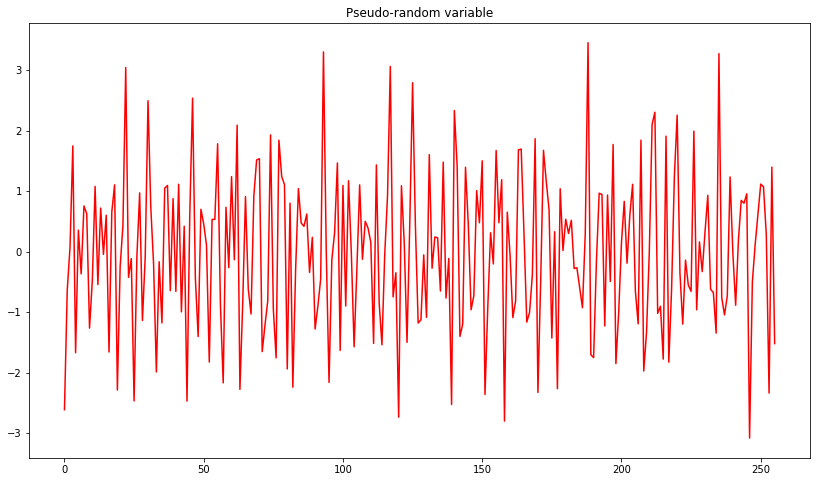

In [4]:
plt.figure(figsize=(14, 8))
plt.title("Pseudo-random variable")
plt.plot(range(N), x, "r")  # random variable
plt.show()

In [5]:
# Simple DFT. (for comparison)
def discrete_fourier_transform(signal):
    signal = np.asarray(signal, dtype=float)
    N = signal.shape[0]
    
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, signal)

# Fast DFT.
def fast_fourier_transform(signal):
    signal = np.asarray(signal, dtype=float)
    N = signal.shape[0]

    if N <= 2:
        return discrete_fourier_transform(signal)
    else:
        signal_even = fast_fourier_transform(signal[::2])
        signal_odd = fast_fourier_transform(signal[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([signal_even + terms[:int(N/2)] * signal_odd,
                               signal_even + terms[int(N/2):] * signal_odd])

In [6]:
# Comparing DFT implementation with FFT implementation.
DFT = discrete_fourier_transform(x)
DFT_R = DFT.real
DFT_I = DFT.imag

FFT = fast_fourier_transform(x)
FFT_R = FFT.real
FFT_I = FFT.imag

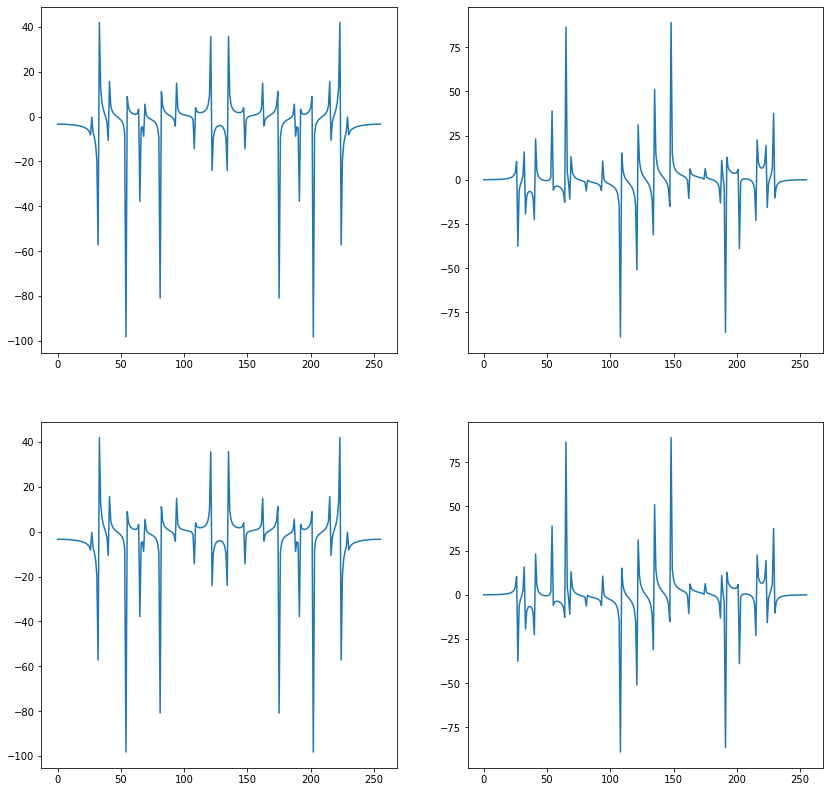

In [7]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
ax1.plot(range(N), DFT_R)
ax2.plot(range(N), DFT_I)
ax3.plot(range(N), FFT_R)
ax4.plot(range(N), FFT_I)
plt.show()

## Additional Task

In [16]:
import threading
import time

In [12]:
def discrete_fourier_transform_multithread(signal):

    def M_cos(thread):
        M['cos'] = np.cos(-2 * np.pi * k * n / N)

    def M_sin(thread):
        M['sin'] = 1j * np.sin(-2 * np.pi * k * n / N)
    
    signal = np.asarray(signal, dtype=float)
    M = dict()
    
    N = signal.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    # Multithreading
    t1 = threading.Thread(target=M_cos, args=(signal.shape[0],)) 
    t2 = threading.Thread(target=M_sin, args=(signal.shape[0],)) 
    t1.start() 
    t2.start() 
    t1.join() 
    t2.join() 
    # End of multithreading
    
    M1 = M['cos'] + M['sin']
    
    return np.dot(M1, signal)

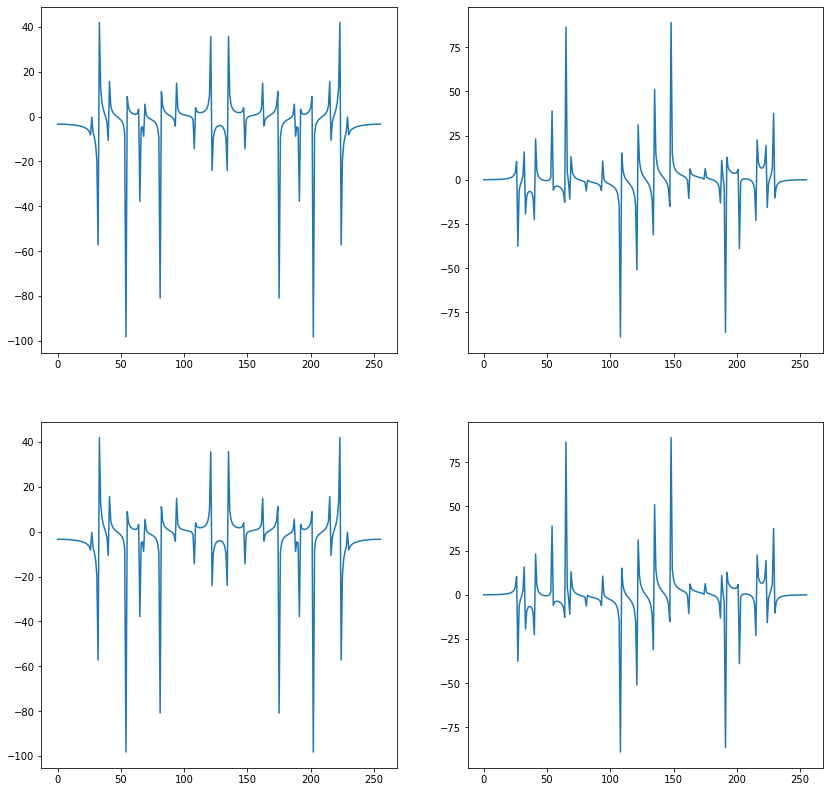

In [17]:
# Comparing DFT implementation with DFT with multithreading.
DFT = discrete_fourier_transform(x)
DFT_R = DFT.real
DFT_I = DFT.imag

DFTM = discrete_fourier_transform_multithread(x)
DFTM_R = DFTM.real
DFTM_I = DFTM.imag

# Plotting graphics
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
ax1.plot(range(N), DFT_R)
ax2.plot(range(N), DFT_I)
ax3.plot(range(N), DFTM_R)
ax4.plot(range(N), DFTM_I)
plt.show()

In [20]:
# Timing two implementations
single_thread_times = list()
multi_thread_times = list()

for N in range(2, 1024):
    
    # generating random signal
    x = np.zeros(N)
    for i in range(1, n+1):
        A = np.random.random()
        phi = np.random.random()

        for t in range(N):
            x[t] += A * np.sin(omega/i * (t + 1) + phi)
    # signal is generated    
    
    start = time.time()  # starting timing for one thread approach
    DFT = discrete_fourier_transform(x)
    end = time.time()
    single_thread_times.append(end - start)  # adding current time to the list of times
    
    start = time.time()  # starting timing for multiple thread approach
    DFT = discrete_fourier_transform_multithread(x)
    end = time.time()
    multi_thread_times.append(end - start)  # adding current time to the list of times

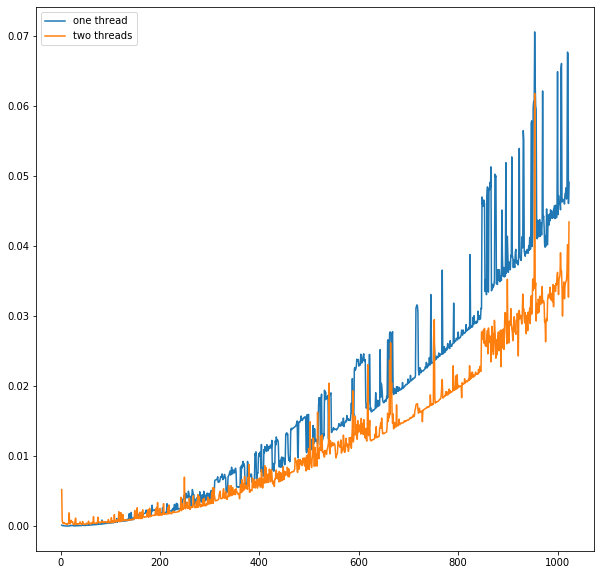

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(range(2, 1024), single_thread_times)
plt.plot(range(2, 1024), multi_thread_times)
plt.legend(["one thread", "two threads"])
plt.show()